In [40]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [41]:
data = load_iris()
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
X = pd.DataFrame(data["data"])
X.columns = data["feature_names"]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
data["target_names"]
result_key = {i: f for i, f in enumerate(data["target_names"])}
print(result_key)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [44]:
y = pd.DataFrame(data["target"])
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8, random_state=0)

In [46]:
y_train

,0
137,2
84,1
27,0
127,2
132,2
...,...
9,0
103,2
67,1
117,2


In [52]:
for n in range(1,16):
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train[0])
    score = model.score(X_test, y_test)
    print(f'{n} : {score}')

1 : 1.0
2 : 0.9666666666666667
3 : 0.9666666666666667
4 : 1.0
5 : 0.9666666666666667
6 : 1.0
7 : 1.0
8 : 1.0
9 : 1.0
10 : 1.0
11 : 1.0
12 : 1.0
13 : 1.0
14 : 1.0
15 : 1.0


In [58]:
model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train[0])

results = []
for state in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8, random_state=state)
    score = model.score(X_test, y_test)
    # print(f'{n} : {score}')
    results.append(score)
print(np.mean(results))

0.9873333333333335


n = 1	score=1.0
n = 2	score=0.9735333333333334
n = 3	score=0.9667
n = 4	score=0.9728333333333334
n = 5	score=0.9796000000000001
n = 6	score=0.9739666666666666
n = 7	score=0.9802000000000001
n = 8	score=0.9739666666666666
n = 9	score=0.9739666666666666
n = 10	score=0.9547333333333333
n = 11	score=0.9675333333333335
n = 12	score=0.9613
n = 13	score=0.9675333333333335
n = 14	score=0.9545666666666667
n = 15	score=0.9675333333333335
n = 16	score=0.9480000000000001
n = 17	score=0.9611000000000002
n = 18	score=0.9414666666666668
n = 19	score=0.9346333333333334
n = 20	score=0.9414666666666668
n = 21	score=0.9414666666666668
n = 22	score=0.9482666666666668
n = 23	score=0.9482666666666668
n = 24	score=0.9482666666666668
n = 25	score=0.9414666666666668
n = 26	score=0.9482666666666668
n = 27	score=0.9482666666666668
n = 28	score=0.9482666666666668
n = 29	score=0.9482666666666668
n = 30	score=0.9482666666666668


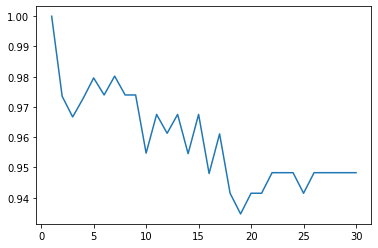

In [80]:
r_x = []
r_y = []
for n in range(1,31):
    results = []
    model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train[0])
    for state in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.8, random_state=state)
        score = model.score(X_test, y_test)
        results.append(score)
    print(f'n = {n}\tscore={np.mean(results)}')
    r_x.append(n)
    r_y.append(np.mean(results))
plt.plot(r_x, r_y)
plt.show()

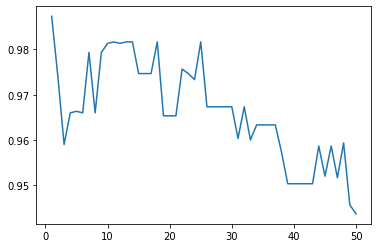

In [78]:
plt.plot(r_x, r_y)

In [ ]:
#best model: should be at least 98% accurate
#n = 1
model = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train[0])